Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-240.707,-250.339,2.44722e-76
2,140.151,4.0,-237.684,-247.301,5.10172e-75
3,140.302,4.0,-234.69,-244.293,1.03371e-73
4,140.452,4.0,-231.723,-241.312,2.03571e-72
5,140.603,4.0,-228.786,-238.361,3.89649e-71
6,140.754,4.0,-225.876,-235.437,7.24884e-70
7,140.905,4.0,-222.996,-232.542,1.31069e-68
8,141.055,4.0,-220.143,-229.676,2.30341e-67
9,141.206,4.0,-217.319,-226.838,3.9344e-66


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,156.734,6.25126,-68.3376,-76.7296,0.611075
2,158.392,7.8593,-68.8054,-77.1127,0.416631
3,158.543,6.33166,-69.6304,-77.9303,0.18393
4,158.844,5.76884,-71.17,-79.4554,0.0400228
5,156.281,6.65327,-67.9453,-76.3616,0.882964
6,157.487,6.73367,-68.3169,-76.6695,0.648944
7,158.241,8.1005,-68.7696,-77.0843,0.428621
8,155.075,10.5126,-70.198,-78.6816,0.086767
9,157.035,7.9397,-68.1364,-76.5125,0.759246


### Snippet 4.23

Density of sigma

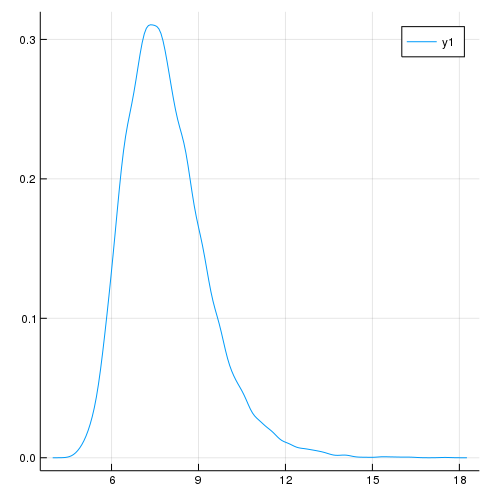

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*